# Intro
> Given data on housing in King County, Washington, can a model be developed to predict the housing prices.  To build this model, the given data will have to be inspected to determine any correlations with the price data, the data will also have to be checked for missing and erroneous entries.  

> The OLS model from statsmodels has assumptions for linear regression.  The data will have to be checked if there is a resemblence of a linear relationship between the target column price and the features.  The residual data of those features should resemble a normal distribution and the variability in the dependent variable price should be equal to the variability in the features.

> The R^2 result will determine how accurate the model performs and the RMSE value will determine how well the model generalizes from training data to test data.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [60]:
data = pd.read_csv("kc_house_data.csv")

# EDA

> ##  1) Check Duplicates
> ##  2) Check for correlations and visualize data, check data types and null values 
> ##  3) Inspect columns to determine discrete/continuous/categorical
> ##  4) Gameplan for features ie scaling/normalize/dummy vars/interaction terms

In [61]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# 1) Check Duplicates

In [63]:
data[data.id.duplicated(keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,0.0,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,...,9,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


## Duplicates results
> Duplicated houses are only 353 entries.  The duplicates have a difference in price but there aren't changes across the other columns, making it ambiguous to determine why or how the price changed.  based on this, I decided to drop these duplicates.

In [64]:
# drop duplicated ids and make sure difference is the same as 353 rows from duplicate check
# len(data) - 353 = 21244
new_data = data.drop_duplicates(subset= ['id'], keep=False)
len(new_data)

21244

# 2) Check for correlations and visualize data, check data types and null values 



In [65]:
new_data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.020157,0.000248,0.003600,-0.014613,-0.133375,0.017719,-0.004212,0.010266,-0.024668,0.004858,-0.012751,0.020761,-0.012549,-0.007755,-0.003725,0.018029,-0.005002,-0.140291
price,-0.020157,1.000000,0.310327,0.525563,0.701259,0.088021,0.254460,0.277537,0.394652,0.033020,0.666911,0.604353,0.049958,0.130801,-0.050190,0.305490,0.018787,0.583107,0.081640
bedrooms,0.000248,0.310327,1.000000,0.516276,0.579945,0.032513,0.177532,-0.002585,0.078527,0.025314,0.359441,0.481121,0.154812,0.017668,-0.156068,-0.012598,0.132843,0.396526,0.030453
bathrooms,0.003600,0.525563,0.516276,1.000000,0.755294,0.087186,0.501029,0.067297,0.184306,-0.132141,0.665364,0.685991,0.505323,0.052366,-0.203050,0.022010,0.222732,0.569047,0.087219
sqft_living,-0.014613,0.701259,0.579945,0.755294,1.000000,0.171716,0.351785,0.110443,0.280775,-0.063836,0.762171,0.876622,0.315129,0.055381,-0.198236,0.049317,0.239221,0.755979,0.183332
sqft_lot,-0.133375,0.088021,0.032513,0.087186,0.171716,1.000000,-0.006311,0.023075,0.075916,-0.009491,0.112574,0.182276,0.051675,0.004595,-0.129265,-0.086131,0.230308,0.142843,0.717279
floors,0.017719,0.254460,0.177532,0.501029,0.351785,-0.006311,1.000000,0.021412,0.025938,-0.269574,0.457394,0.521505,0.488677,0.002067,-0.057565,0.048567,0.123689,0.278054,-0.012013
waterfront,-0.004212,0.277537,-0.002585,0.067297,0.110443,0.023075,0.021412,1.000000,0.408862,0.017536,0.087589,0.075385,-0.026794,0.087542,0.031615,-0.012992,-0.040412,0.089066,0.031952
view,0.010266,0.394652,0.078527,0.184306,0.280775,0.075916,0.025938,0.408862,1.000000,0.043853,0.246800,0.164836,-0.058036,0.100298,0.089851,0.005161,-0.080546,0.276800,0.073934
condition,-0.024668,0.033020,0.025314,-0.132141,-0.063836,-0.009491,-0.269574,0.017536,0.043853,1.000000,-0.153940,-0.164007,-0.368624,-0.062772,0.005716,-0.015997,-0.108359,-0.097335,-0.003755


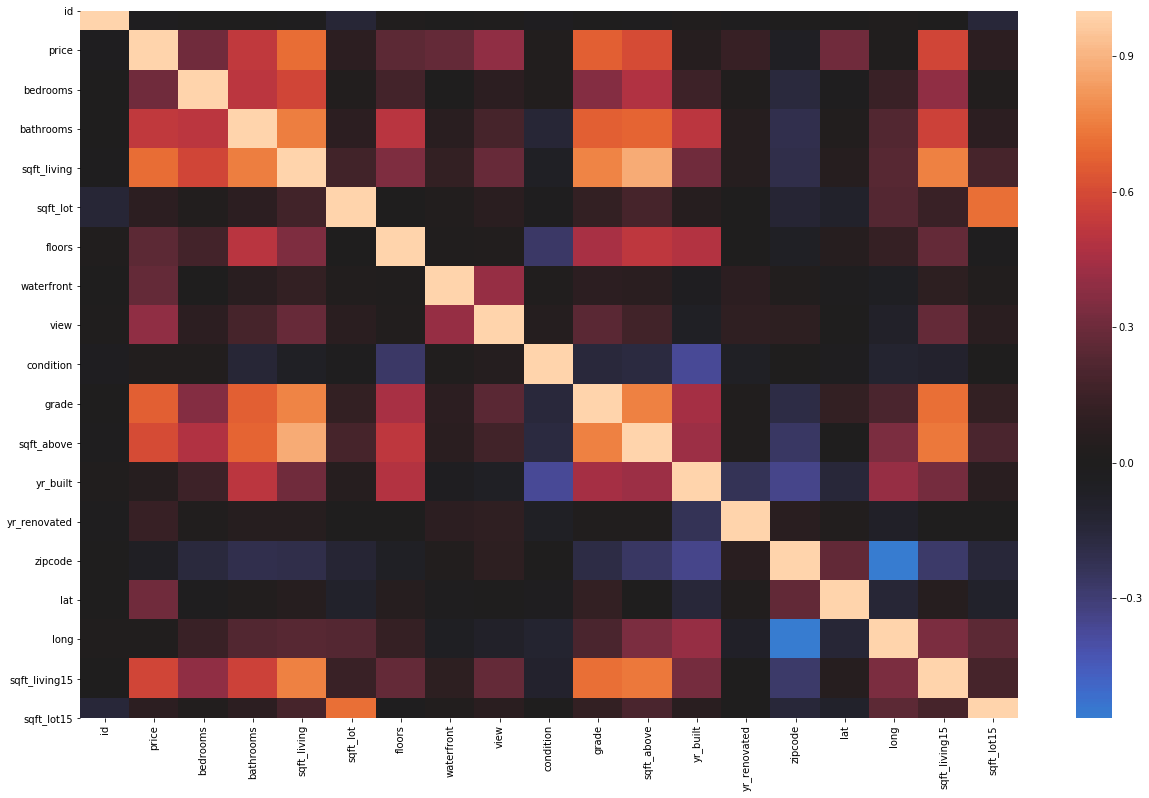

In [66]:
fig = plt.figure(figsize=(21,13))

fig = sns.heatmap(new_data.corr(), center=0)

In [67]:
cols = [i for i in new_data.columns]
cols.pop(2)

cols

['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [68]:
view_A_df = new_data[['price','id', 'date', 'bedrooms', 'bathrooms','sqft_living','sqft_lot', 'floors', 
                      'waterfront', 'view', 'condition', 'grade']]
view_B_df = new_data[['price', 'sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long',
                      'sqft_living15','sqft_lot15']]

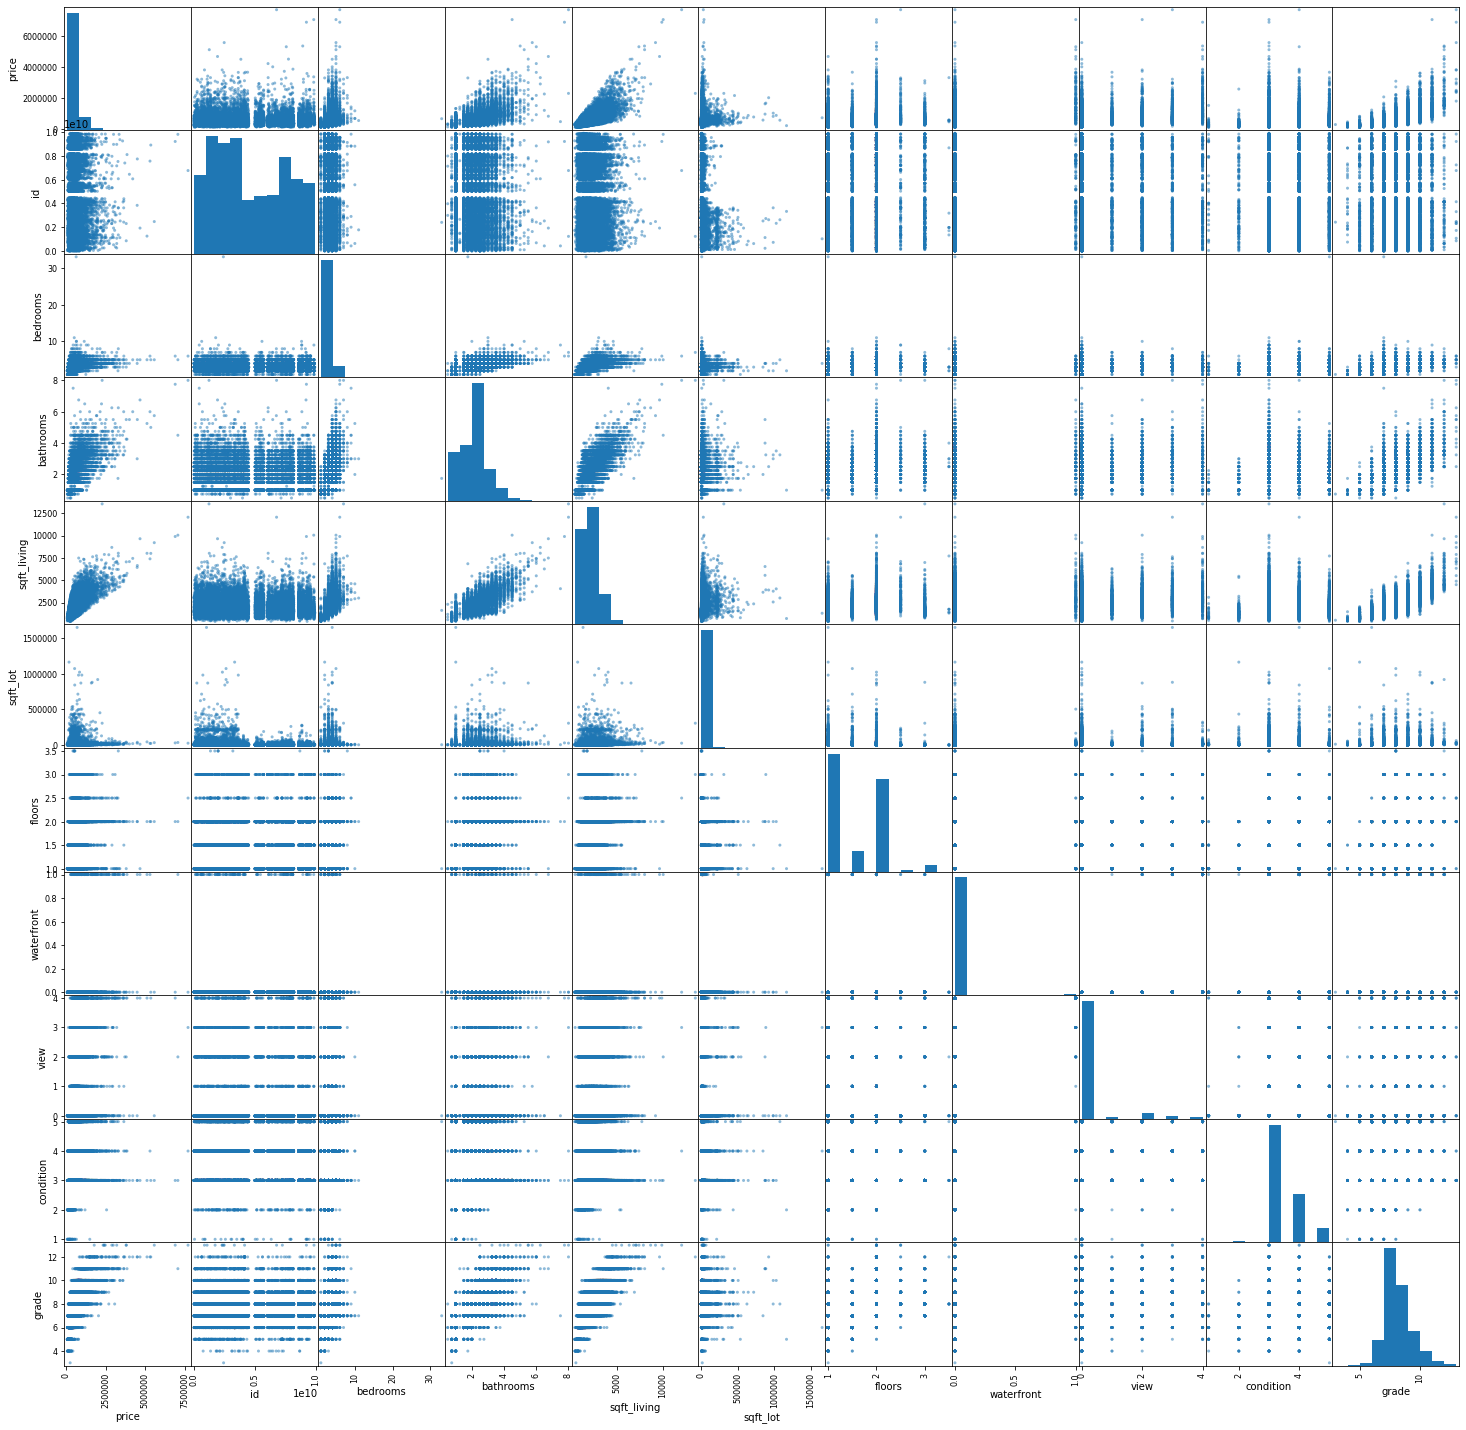

In [69]:
pd.plotting.scatter_matrix(view_A_df, figsize=(25,25));

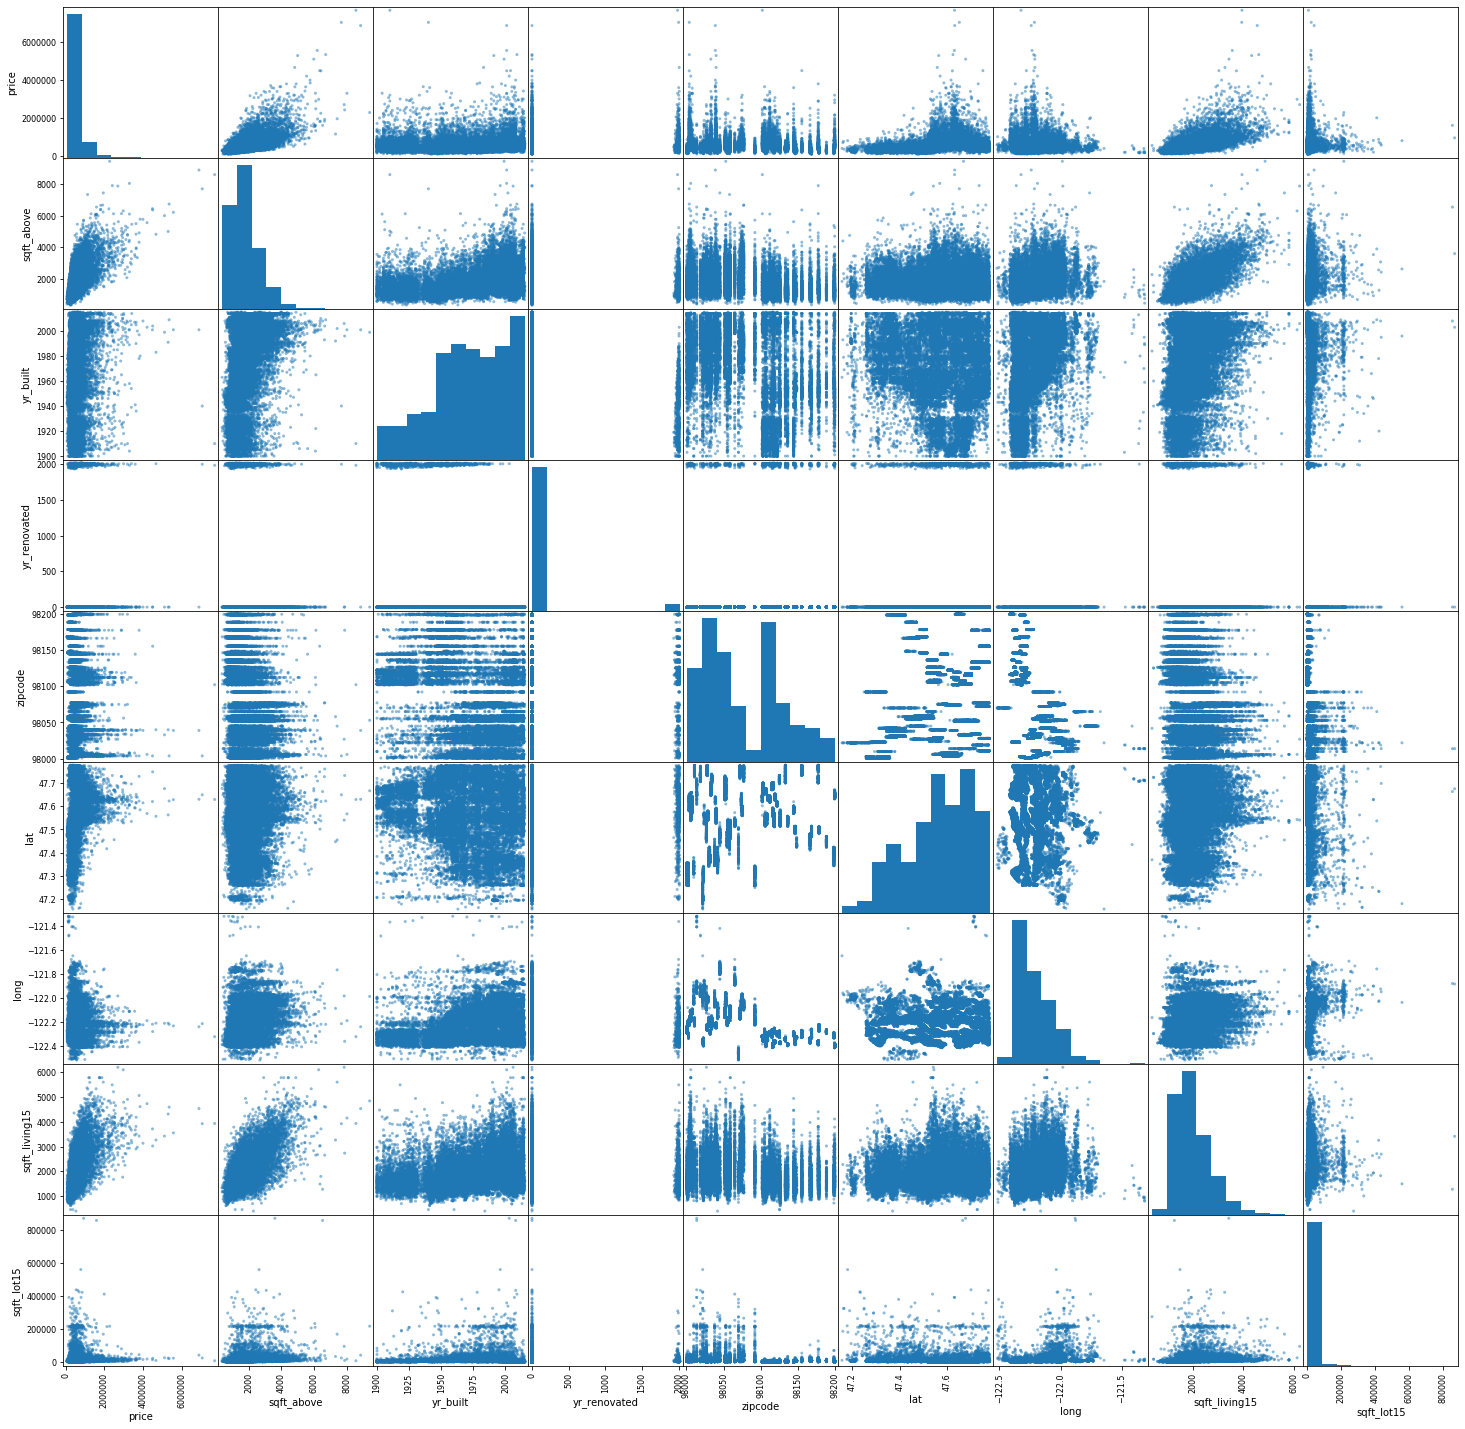

In [70]:
pd.plotting.scatter_matrix(view_B_df, figsize=(25,25));

## Correlation and distribution notes

> Several columns have a linear relationship with the price column.  Another thing to note is that from the heatmap, it was visible that some of the independent columns had correlations with other columns that weren't the target.  This will result in multicollinearity which will affect the accuracy of the model.

In [71]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21244 entries, 0 to 21596
Data columns (total 21 columns):
id               21244 non-null int64
date             21244 non-null object
price            21244 non-null float64
bedrooms         21244 non-null int64
bathrooms        21244 non-null float64
sqft_living      21244 non-null int64
sqft_lot         21244 non-null int64
floors           21244 non-null float64
waterfront       18914 non-null float64
view             21181 non-null float64
condition        21244 non-null int64
grade            21244 non-null int64
sqft_above       21244 non-null int64
sqft_basement    21244 non-null object
yr_built         21244 non-null int64
yr_renovated     17469 non-null float64
zipcode          21244 non-null int64
lat              21244 non-null float64
long             21244 non-null float64
sqft_living15    21244 non-null int64
sqft_lot15       21244 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


## NaN's
> Isolate the columns with null values and inspect them.  Use .value_counts() to inspect the frequency to determine how to handle nans.  

In [72]:
def get_null_cols(df):
    """
    Input a dataframe
    Return a dataframe with only the columns that have null values
    """
    cols_w_nulls = []
    for col in df.columns:
        if df[col].hasnans:
            cols_w_nulls.append(col)
    df_nulls = df[cols_w_nulls]
    return (df_nulls)

null_df = get_null_cols(new_data)
null_df.head()

,waterfront,view,yr_renovated
0,NaN,0.0,0.0
1,0.0,0.0,1991.0
2,0.0,0.0,NaN
3,0.0,0.0,0.0
4,0.0,0.0,0.0


# Waterfront column  
> Waterfront is a discrete variable that differentiates between a property with waterfront views or not.  A majority of the values are 0.  It is difficult to determine whether or not the missing values are waterfront property or not from the rest of the data.  The lat/lon columns could be used to see if any missing values are near values with waterfront views.  I don't think the waterfront feature will be very useful so I am going to assign the missing values to zero and  make note when I get the regression results.

In [73]:
water_values_dict = new_data.waterfront.value_counts(dropna=False).to_dict()
water_values_dict

{0.0: 18768, nan: 2330, 1.0: 146}

In [74]:
new_data.waterfront = new_data.waterfront.fillna(value= 0.0)


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# View Column
> The view column is another column that I don't think will be very useful.  I'm going to fill the missing values with zeros and make a note to inspect later.

In [75]:
view_vals_dict = new_data.view.value_counts(dropna=False).to_dict()
view_vals_dict

{0.0: 19085, 2.0: 955, 3.0: 502, 1.0: 328, 4.0: 311, nan: 63}

In [76]:
new_data.view = new_data.view.fillna(value=0.0)

# Year Renovated column 
> The year renovated column is very interesting.  For now, the missing data will get assigned to zero to imply that the property was not renovated.

In [77]:
yr_ren_vals_dict = new_data['yr_renovated'].value_counts(dropna=False).to_dict()
yr_ren_vals_dict

{0.0: 16733,
 nan: 3775,
 2014.0: 73,
 2003.0: 31,
 2013.0: 31,
 2007.0: 30,
 2000.0: 29,
 2005.0: 29,
 2004.0: 22,
 2009.0: 21,
 1990.0: 20,
 1989.0: 20,
 2006.0: 20,
 2002.0: 17,
 1991.0: 16,
 1998.0: 16,
 1999.0: 15,
 2008.0: 15,
 2010.0: 15,
 2001.0: 15,
 1983.0: 15,
 2015.0: 14,
 1987.0: 14,
 1984.0: 14,
 1994.0: 14,
 1986.0: 14,
 1985.0: 14,
 1992.0: 13,
 1995.0: 12,
 1997.0: 12,
 1993.0: 12,
 1988.0: 11,
 1996.0: 11,
 2011.0: 9,
 1970.0: 9,
 1982.0: 8,
 2012.0: 8,
 1979.0: 7,
 1977.0: 7,
 1968.0: 7,
 1980.0: 6,
 1975.0: 5,
 1963.0: 4,
 1981.0: 4,
 1973.0: 4,
 1965.0: 4,
 1969.0: 4,
 1972.0: 3,
 1960.0: 3,
 1958.0: 3,
 1956.0: 3,
 1955.0: 3,
 1978.0: 3,
 1964.0: 3,
 1945.0: 3,
 1967.0: 2,
 1962.0: 2,
 1974.0: 2,
 1940.0: 2,
 1957.0: 2,
 1934.0: 1,
 1976.0: 1,
 1948.0: 1,
 1954.0: 1,
 1971.0: 1,
 1959.0: 1,
 1944.0: 1,
 1953.0: 1,
 1951.0: 1,
 1946.0: 1,
 1950.0: 1}

In [78]:
new_data['yr_renovated'] = new_data['yr_renovated'].fillna(value= 0.0)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
# check that there are no columns with nulls
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21244 entries, 0 to 21596
Data columns (total 21 columns):
id               21244 non-null int64
date             21244 non-null object
price            21244 non-null float64
bedrooms         21244 non-null int64
bathrooms        21244 non-null float64
sqft_living      21244 non-null int64
sqft_lot         21244 non-null int64
floors           21244 non-null float64
waterfront       21244 non-null float64
view             21244 non-null float64
condition        21244 non-null int64
grade            21244 non-null int64
sqft_above       21244 non-null int64
sqft_basement    21244 non-null object
yr_built         21244 non-null int64
yr_renovated     21244 non-null float64
zipcode          21244 non-null int64
lat              21244 non-null float64
long             21244 non-null float64
sqft_living15    21244 non-null int64
sqft_lot15       21244 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


# 3) Inspect columns to determine discrete/continuous/categorical

>  Go through columns and determine if they are continuous or discrete.  Then determine which columns to be used for feature engineering.

In [80]:
for col in new_data.columns:
    print(new_data[col].value_counts(),'\n')

2911700010    1
5631500905    1
1922069099    1
5104511600    1
1160000115    1
             ..
1322059002    1
4222310680    1
6446200060    1
301402280     1
1777500160    1
Name: id, Length: 21244, dtype: int64 

6/23/2014    142
6/25/2014    130
6/26/2014    127
4/27/2015    126
3/25/2015    122
            ... 
1/17/2015      1
7/27/2014      1
1/10/2015      1
11/2/2014      1
5/17/2014      1
Name: date, Length: 372, dtype: int64 

450000.0    171
350000.0    167
550000.0    154
500000.0    150
425000.0    149
           ... 
418900.0      1
234975.0      1
804995.0      1
870515.0      1
884744.0      1
Name: price, Length: 3580, dtype: int64 

3     9639
4     6816
2     2712
5     1571
6      258
1      186
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64 

2.50    5327
1.00    3738
1.75    2992
2.25    2015
2.00    1896
1.50    1413
2.75    1179
3.00     741
3.50     727
3.25     583
3.75     155
4.00     132
4.50      98
4.25   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

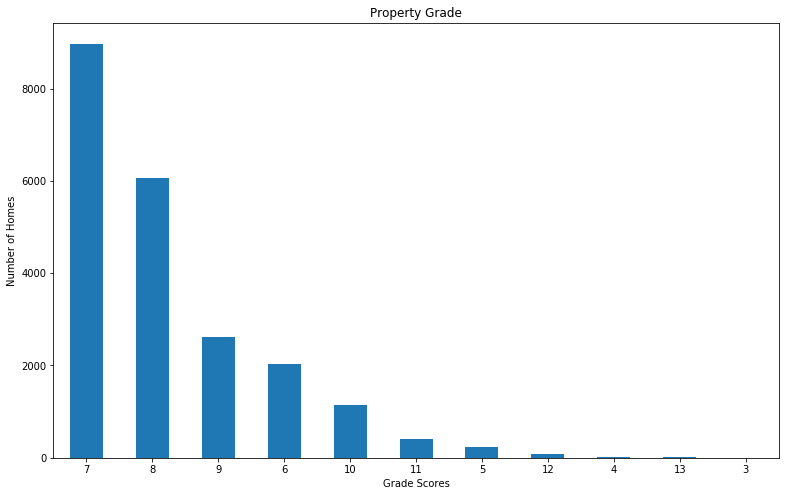

In [81]:
fig = plt.figure(figsize=(13,8))

fig = data.grade.value_counts().plot(kind='bar')
plt.title('Property Grade')
plt.ylabel('Number of Homes')
plt.xlabel('Grade Scores')
plt.xticks(rotation=0)

#### My initial exploration missed 450 instances of a question mark entry for the 'sqft_basement' column.  Upon investigation, the 'sqft_above' + 'sqft_basement' = 'sqft_living' 

I am going to use the living and lot columns for square footage and create a ratio so I won't need the above or basement data.

In [82]:
new_data[new_data['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,0.0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0.0,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [83]:
new_data[['sqft_living', 'sqft_above', 'floors']][new_data['sqft_basement'] == '?']

,sqft_living,sqft_above,floors
6,1715,1715,2.0
18,1200,1200,1.0
42,3595,3595,2.0
79,3450,3450,2.0
112,1540,1160,1.0
...,...,...,...
21442,2360,1390,1.0
21447,2330,2330,2.0
21473,980,980,3.0
21519,2380,2380,2.0


## Inspection Notes

> The columns 'Bedrooms', 'Bathrooms', 'Condition', 'Floors', and 'Grade' are discrete variables.  To give these features similar magnitudes, I am going to perform Min-Max scaling.

> The columns representing year built, year renovated, basement square footage, and the latitude/longitude are going to be engineered into categorical features.

> The columns with square-footage are continuous variables. Scaling these variables will be done by normalization.

# 4) Gameplan for features ie scaling/normalize/dummy vars/interaction terms

In [84]:
to_scale_list = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']


In [85]:
new_data.floors.value_counts()

1.0    10432
2.0     8171
1.5     1866
3.0      607
2.5      161
3.5        7
Name: floors, dtype: int64

In [86]:
for col in to_scale_list:
    new_data[col] = new_data[col].apply(lambda x: (x - new_data[col].min())/(new_data[col].max() - new_data[col].min()))



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
new_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,0.06250,0.066667,1180,5650,0.0,0.0,0.0,...,0.4,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,0.06250,0.233333,2570,7242,0.4,0.0,0.0,...,0.4,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,0.03125,0.066667,770,10000,0.0,0.0,0.0,...,0.3,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,0.09375,0.333333,1960,5000,0.0,0.0,0.0,...,0.4,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,0.06250,0.200000,1680,8080,0.0,0.0,0.0,...,0.5,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Renovated Feature
> Enginner a renovated feature that has binary data determining if the property was renovated ever.

In [88]:
new_data['renovated'] = new_data.yr_renovated.apply(lambda x: 1 if x > 0.0 else 0)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Year Built binning
> Bin the year built data into bins

In [89]:
ser = new_data.yr_built.value_counts().sort_index()
arr = pd.cut(ser.index,bins = 5,retbins = True)[1]

def cat_yr(x):   
    if x <= arr[1]:
        return('yrs_' + str(int(round(arr[0],0))) + '_' + str(int(arr[1])))
    elif arr[1] < x <= arr[2]:
        return('yrs_' + str(int(arr[1])) + '_' + str(int(arr[2])))
    elif arr[2] < x <= arr[3]:
        return('yrs_' + str(int(arr[2])) + '_' + str(int(arr[3])))
    elif arr[3] < x <= arr[4]:
        return('yrs_' + str(int(arr[3])) + '_' + str(int(arr[4])))
    else:
        return('yrs_' + str(int(arr[4])) + '_' + str(int(arr[5])))
    
new_data['year_cat'] = new_data.yr_built.apply(cat_yr)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [90]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21244 entries, 0 to 21596
Data columns (total 23 columns):
id               21244 non-null int64
date             21244 non-null object
price            21244 non-null float64
bedrooms         21244 non-null float64
bathrooms        21244 non-null float64
sqft_living      21244 non-null int64
sqft_lot         21244 non-null int64
floors           21244 non-null float64
waterfront       21244 non-null float64
view             21244 non-null float64
condition        21244 non-null float64
grade            21244 non-null float64
sqft_above       21244 non-null int64
sqft_basement    21244 non-null object
yr_built         21244 non-null int64
yr_renovated     21244 non-null float64
zipcode          21244 non-null int64
lat              21244 non-null float64
long             21244 non-null float64
sqft_living15    21244 non-null int64
sqft_lot15       21244 non-null int64
renovated        21244 non-null int64
year_cat         21244 non-null

In [91]:
new_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,year_cat
0,7129300520,10/13/2014,221900.0,0.06250,0.066667,1180,5650,0.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,yrs_1946_1969
1,6414100192,12/9/2014,538000.0,0.06250,0.233333,2570,7242,0.4,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,yrs_1946_1969
2,5631500400,2/25/2015,180000.0,0.03125,0.066667,770,10000,0.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,yrs_1923_1946
3,2487200875,12/9/2014,604000.0,0.09375,0.333333,1960,5000,0.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,yrs_1946_1969
4,1954400510,2/18/2015,510000.0,0.06250,0.200000,1680,8080,0.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,yrs_1969_1992


In [92]:
dummy_yr_cat_df = pd.get_dummies(new_data.year_cat)
dummy_yr_cat_df

,yrs_1900_1923,yrs_1923_1946,yrs_1946_1969,yrs_1969_1992,yrs_1992_2015
0,0,0,1,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
21592,0,0,0,0,1
21593,0,0,0,0,1
21594,0,0,0,0,1
21595,0,0,0,0,1


In [93]:
new_data.shape

(21244, 23)

In [94]:
new_data = new_data.join(dummy_yr_cat_df)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

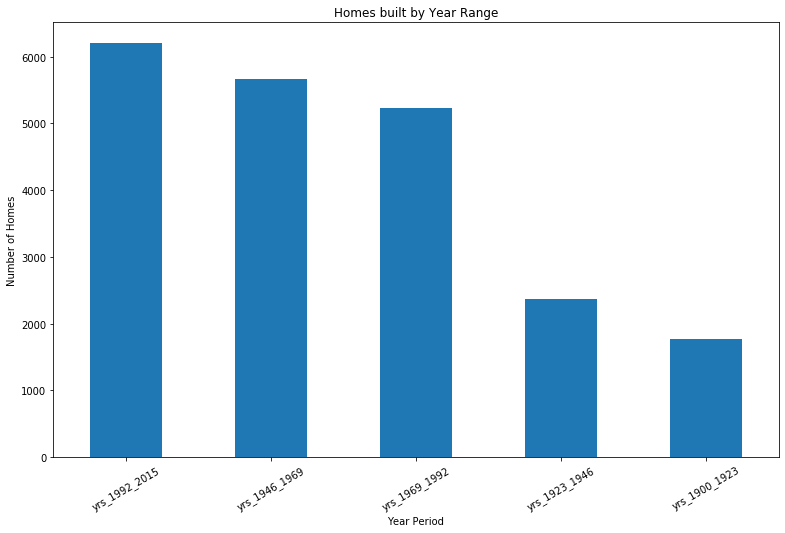

In [95]:
fig = plt.figure(figsize=(13,8))

fig = new_data.year_cat.value_counts().plot(kind='bar')
plt.title('Homes built by Year Range')
plt.ylabel('Number of Homes')
plt.xlabel('Year Period')
plt.xticks(rotation=30)

# Location Feature
> Categorize the data by assigning them a quadrant using the longitde and latitude data.  

In [96]:
# function for getting N,S,E,W quadrants of the county
def create_quad(row):
    mean_lat = new_data['lat'].mean()
    mean_long = new_data['long'].mean()
    
    if row['lat'] >= mean_lat and row['long'] <= mean_long:
        return('NW')
    elif row['lat'] >= mean_lat and row['long'] > mean_long:
        return('NE')
    elif row['lat'] < mean_lat and row['long'] <= mean_long:
        return('SW')
    else:
        return('SE')
    
#create a column in dataframe for quad    
new_data['quad'] = new_data.apply(create_quad, axis=1)
# Create dummy variables (i.e. each value in the quad column will become its own column)
quad_dum = pd.get_dummies(new_data.quad)
# Join the quad columns in with the new dataframe.
new_data = new_data.join(quad_dum)
# Prints the dataframe in jupyter
new_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yrs_1900_1923,yrs_1923_1946,yrs_1946_1969,yrs_1969_1992,yrs_1992_2015,quad,NE,NW,SE,SW
0,7129300520,10/13/2014,221900.0,0.06250,0.066667,1180,5650,0.0,0.0,0.0,...,0,0,1,0,0,SW,0,0,0,1
1,6414100192,12/9/2014,538000.0,0.06250,0.233333,2570,7242,0.4,0.0,0.0,...,0,0,1,0,0,NW,0,1,0,0
2,5631500400,2/25/2015,180000.0,0.03125,0.066667,770,10000,0.0,0.0,0.0,...,0,1,0,0,0,NW,0,1,0,0
3,2487200875,12/9/2014,604000.0,0.09375,0.333333,1960,5000,0.0,0.0,0.0,...,0,0,1,0,0,SW,0,0,0,1
4,1954400510,2/18/2015,510000.0,0.06250,0.200000,1680,8080,0.0,0.0,0.0,...,0,0,0,1,0,NE,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,0.06250,0.266667,1530,1131,0.8,0.0,0.0,...,0,0,0,0,1,NW,0,1,0,0
21593,6600060120,2/23/2015,400000.0,0.09375,0.266667,2310,5813,0.4,0.0,0.0,...,0,0,0,0,1,SW,0,0,0,1
21594,1523300141,6/23/2014,402101.0,0.03125,0.033333,1020,1350,0.4,0.0,0.0,...,0,0,0,0,1,NW,0,1,0,0
21595,291310100,1/16/2015,400000.0,0.06250,0.266667,1600,2388,0.4,0.0,0.0,...,0,0,0,0,1,SE,0,0,1,0


# Transform the continuous data
> Use the Normalizer function to normalize the data involving the square footage, then create ratios representing how much of the lot is liveable square footage.   The basement square footage column has been omitted due to possible multicollinearity issues.  It is something to keep note of after the results from the OLS are processed.

In [97]:
from sklearn.preprocessing import Normalizer

to_norm_df = new_data[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']]
transformer = Normalizer().fit(to_norm_df)
transformed = transformer.transform(to_norm_df)

In [98]:
new_data.sqft_living = transformed[:,0]
new_data.sqft_lot = transformed[:,1]
new_data.sqft_living15 = transformed[:,2]
new_data.sqft_lot15 = transformed[:,3]

In [99]:
new_data['live_lot_ratio'] = new_data.sqft_living / new_data.sqft_lot

In [100]:
new_data['live_lot15_rat'] = new_data.sqft_living15 / new_data.sqft_lot15

In [101]:
new_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yrs_1946_1969,yrs_1969_1992,yrs_1992_2015,quad,NE,NW,SE,SW,live_lot_ratio,live_lot15_rat
0,7129300520,10/13/2014,221900.0,0.06250,0.066667,0.144124,0.690087,0.0,0.0,0.0,...,1,0,0,SW,0,0,0,1,0.208850,0.237168
1,6414100192,12/9/2014,538000.0,0.06250,0.233333,0.234352,0.660381,0.4,0.0,0.0,...,1,0,0,NW,0,1,0,0,0.354874,0.221233
2,5631500400,2/25/2015,180000.0,0.03125,0.066667,0.058544,0.760314,0.0,0.0,0.0,...,0,0,0,NW,0,1,0,0,0.077000,0.337385
3,2487200875,12/9/2014,604000.0,0.09375,0.333333,0.262641,0.670003,0.0,0.0,0.0,...,1,0,0,SW,0,0,0,1,0.392000,0.272000
4,1954400510,2/18/2015,510000.0,0.06250,0.200000,0.148699,0.715174,0.0,0.0,0.0,...,0,1,0,NE,1,0,0,0,0.207921,0.239904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,0.06250,0.266667,0.533064,0.394049,0.8,0.0,0.0,...,0,0,1,NW,0,1,0,0,1.352785,1.013917
21593,6600060120,2/23/2015,400000.0,0.09375,0.266667,0.237859,0.598560,0.4,0.0,0.0,...,0,0,1,SW,0,0,0,1,0.397385,0.254167
21594,1523300141,6/23/2014,402101.0,0.03125,0.033333,0.362182,0.479358,0.4,0.0,0.0,...,0,0,1,NW,0,1,0,0,0.755556,0.508221
21595,291310100,1/16/2015,400000.0,0.06250,0.266667,0.463680,0.692043,0.4,0.0,0.0,...,0,0,1,SE,0,0,1,0,0.670017,1.095571


In [102]:
new_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated', 'year_cat',
       'yrs_1900_1923', 'yrs_1923_1946', 'yrs_1946_1969', 'yrs_1969_1992',
       'yrs_1992_2015', 'quad', 'NE', 'NW', 'SE', 'SW', 'live_lot_ratio',
       'live_lot15_rat'],
      dtype='object')

# Prepare for OLS
> Now that the data is in the format that I would like for OLS I can now organize the features together and get ready to split for training and test.  Before that, there will be multicollinearity issues with the year built data as well as the quadrant location data.  It is possible to predict values for these columns so ommitting one from each should help take care of the multicollinearity issue.

# First Iteration
> After looking at the value counts for the years built and the location quadrant categories, I chose to omit the 1900-1923 and NE for this iteration.  These omissions should handle any multicollinearity issues.

In [103]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
            'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'grade','sqft_living15', 'sqft_lot15', 'renovated', 
            'yrs_1923_1946', 'yrs_1946_1969', 'yrs_1969_1992', 'yrs_1992_2015',
            'SE', 'SW', 'NW', 'live_lot_ratio', 'live_lot15_rat']
final_data = new_data[features]
final_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,renovated,yrs_1923_1946,yrs_1946_1969,yrs_1969_1992,yrs_1992_2015,SE,SW,NW,live_lot_ratio,live_lot15_rat
0,221900.0,0.06250,0.066667,0.144124,0.690087,0.0,0.0,0.0,0.5,0.4,...,0,0,1,0,0,0,1,0,0.208850,0.237168
1,538000.0,0.06250,0.233333,0.234352,0.660381,0.4,0.0,0.0,0.5,0.4,...,1,0,1,0,0,0,0,1,0.354874,0.221233
2,180000.0,0.03125,0.066667,0.058544,0.760314,0.0,0.0,0.0,0.5,0.3,...,0,1,0,0,0,0,0,1,0.077000,0.337385
3,604000.0,0.09375,0.333333,0.262641,0.670003,0.0,0.0,0.0,1.0,0.4,...,0,0,1,0,0,0,1,0,0.392000,0.272000
4,510000.0,0.06250,0.200000,0.148699,0.715174,0.0,0.0,0.0,0.5,0.5,...,0,0,0,1,0,0,0,0,0.207921,0.239904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,0.06250,0.266667,0.533064,0.394049,0.8,0.0,0.0,0.5,0.5,...,0,0,0,0,1,0,0,1,1.352785,1.013917
21593,400000.0,0.09375,0.266667,0.237859,0.598560,0.4,0.0,0.0,0.5,0.5,...,0,0,0,0,1,0,1,0,0.397385,0.254167
21594,402101.0,0.03125,0.033333,0.362182,0.479358,0.4,0.0,0.0,0.5,0.4,...,0,0,0,0,1,0,0,1,0.755556,0.508221
21595,400000.0,0.06250,0.266667,0.463680,0.692043,0.4,0.0,0.0,0.5,0.5,...,0,0,0,0,1,1,0,0,0.670017,1.095571


In [104]:
print(new_data.year_cat.value_counts(), '\n')
print(new_data.quad.value_counts())

yrs_1992_2015    6205
yrs_1946_1969    5663
yrs_1969_1992    5235
yrs_1923_1946    2374
yrs_1900_1923    1767
Name: year_cat, dtype: int64 

NW    6758
SE    5237
NE    4651
SW    4598
Name: quad, dtype: int64


In [105]:
from sklearn.model_selection import train_test_split
X = final_data

import statsmodels.api as sm
from statsmodels.formula.api import ols

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [106]:
feats = final_data.drop('price', axis=1)

outcome = 'price'

pred_sum = '+'.join(feats.columns)
formula = outcome + '~' + pred_sum
pred_sum
formula

model = ols(formula=formula, data=X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1569.
Date:                Thu, 21 May 2020   Prob (F-statistic):               0.00
Time:                        15:33:02   Log-Likelihood:            -2.3258e+05
No. Observations:               16995   AIC:                         4.652e+05
Df Residuals:                   16973   BIC:                         4.654e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.266e+05   7.48e+04     -1.692      0.091   -2.73e+05       2e+04
bedrooms       -7846.7155   7.13e+04     -0.110      0.912   -1.48e+05    1.32e+05
bathrooms        8.35e+05   2.71e+04     30.765      0.000    7.82e+05    8.88e+05
sqft_living     3.905e+05   5.09e+04      7.665      0.000    2.91e+05     4.9e+05
sqft_lot       -5.091e+04    5.7e+04     -0.893      0.372   -1.63e+05    6.08e+04
floors         -3.843e+04   1.15e+04     -3.348      0.001   -6.09e+04   -1.59e+04
waterfront      6.465e+05   2.17e+04     29.769      0.000    6.04e+05    6.89e+05
view            6.524e+04   2467.186     26.441      0.000    6.04e+04    7.01e+04
condition       1.254e+05   1.14e+04     11.024      0.000    1.03e+05    1.48e+05
grade           1.666e+06   2.03e+04     82.017      0.000    1.63e+06    1.71e+06
sqft_living15  -3.306e+05   6.38e+04     -5.182      0.000   -4.56e+05   -2.06e+05
sqft_lot15     -1.065e+05   5.02e+04     -2.124      0.034   -2.05e+05   -8228.525
renovated       3.343e+04   9590.892      3.485      0.000    1.46e+04    5.22e+04
yrs_1923_1946  -4.007e+04   7533.388     -5.319      0.000   -5.48e+04   -2.53e+04
yrs_1946_1969  -1.439e+05   6953.397    -20.695      0.000   -1.58e+05    -1.3e+05
yrs_1969_1992  -2.547e+05   7603.997    -33.500      0.000    -2.7e+05    -2.4e+05
yrs_1992_2015  -2.333e+05   8450.037    -27.606      0.000    -2.5e+05   -2.17e+05
SE             -1.587e+05   4930.022    -32.182      0.000   -1.68e+05   -1.49e+05
SW              -1.75e+05   5342.402    -32.764      0.000   -1.86e+05   -1.65e+05
NW              9214.0925   5344.198      1.724      0.085   -1261.091    1.97e+04
live_lot_ratio -9.343e+04   2.71e+04     -3.444      0.001   -1.47e+05   -4.03e+04
live_lot15_rat -3.155e+04   3.49e+04     -0.905      0.366   -9.99e+04    3.68e+04
==============================================================================
Omnibus:                    16280.964   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2450046.752
Skew:                           4.225   Prob(JB):                         0.00
Kurtosis:                      61.211   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# OLS Results
> The R^2 isn't as strong as hoped. Bathrooms and square footage of the living space were the best performers.

# MSE Check

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

predictors = X_train.drop(['price'], axis=1)
y_train = X_train['price']
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
y_test = X_test['price']


y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 6.073308468021804e-20
Test Mean Squarred Error: 6.457390260405714e-20


# MSE Results
> The MSE results conclude that eventhough the model isn't impressively accurate, it does generalize well for future cases.

# Feature ranking 

> The R^2 is not as high as I had hoped.  I can use sklearn's RFE to check if any ranked features help the R^2

In [109]:
from sklearn.feature_selection import RFE

def feature_ranking(n_feats, feats, target, data):
    """
    Inputs:
    n_feats: (int) n_features_to_select arg for RFE selector.  Number can't be greater than len(feats)
    feats: df with all the features
    target: Series with the target data
    
    
    Returns:
    OLS model summary R^2
    """
    #Get the feature rankings array
    linreg = LinearRegression()
    selector = RFE(linreg, n_features_to_select=n_feats)
    selector = selector.fit(feats, target)
    
    #Generate a dictionary that indexes the results of the ranking selector array
    keepers = dict(enumerate(selector.ranking_))
    
    #Create list of the features to keep using the dictionary keys as indexes
    
    idxs = [k for k,v in keepers.items() if int(v) == 1]
    keeper_features = []
    feats_cols = list(feats.columns)
    for idx in idxs:
        keeper_features.append(feats_cols[idx])
        
    #Prepare a new OLS model with the ranked features
    outcome = 'price'

    pred_sum = '+'.join(keeper_features)
    formula = outcome + '~' + pred_sum
    
    model = ols(formula=formula, data=data).fit()
    # Return R^2
    return('R^2: {}'.format(model.rsquared))
    

In [110]:
best_5 = feature_ranking(5, feats, final_data.price, X_train)
best_8 = feature_ranking(8, feats, final_data.price, X_train)
best_12 = feature_ranking(12, feats, final_data.price, X_train)
best_15 = feature_ranking(15, feats, final_data.price, X_train)

for el, var in zip([5,8,12,15], [best_5, best_8, best_12, best_15]):
    print('Best {} Features {}'.format(el, var))

Best 5 Features R^2: 0.5765339832938536
Best 8 Features R^2: 0.5992427584041987
Best 12 Features R^2: 0.6439960669110674
Best 15 Features R^2: 0.6590523599915676


# Feature Ranking Results
> The results did not help as I had hoped.  As the number of features decreased, the R^2 decreased. 

# First Iteration Results:
> The R^2 wasn't ideal but the model generalized well.  A handful of the features were not statistically significant and should be dropped from the next iteration.

# Second Iteration:
> Bedrooms, sqft_lot, sqft_lot15, NW, and the live_lot15_rat categories will be dropped in this iteration because they did not show a statistically significant relationship with price.

In [111]:
features = ['price', 'bathrooms', 'sqft_living',
            'floors', 'waterfront', 'view',
            'condition', 'grade','sqft_living15', 'renovated', 
            'yrs_1923_1946', 'yrs_1946_1969', 'yrs_1969_1992', 'yrs_1992_2015',
            'SE', 'SW', 'live_lot_ratio']
final_data = new_data[features]
final_data

,price,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_living15,renovated,yrs_1923_1946,yrs_1946_1969,yrs_1969_1992,yrs_1992_2015,SE,SW,live_lot_ratio
0,221900.0,0.066667,0.144124,0.0,0.0,0.0,0.5,0.4,0.163667,0,0,1,0,0,0,1,0.208850
1,538000.0,0.233333,0.234352,0.4,0.0,0.0,0.5,0.4,0.154107,1,0,1,0,0,0,0,0.354874
2,180000.0,0.066667,0.058544,0.0,0.0,0.0,0.5,0.3,0.206805,0,1,0,0,0,0,0,0.077000
3,604000.0,0.333333,0.262641,0.0,0.0,0.0,1.0,0.4,0.182241,0,0,1,0,0,0,1,0.392000
4,510000.0,0.200000,0.148699,0.0,0.0,0.0,0.5,0.5,0.159321,0,0,0,1,0,0,0,0.207921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,0.266667,0.533064,0.8,0.0,0.0,0.5,0.5,0.533064,0,0,0,0,1,0,0,1.352785
21593,400000.0,0.266667,0.237859,0.4,0.0,0.0,0.5,0.5,0.188434,0,0,0,0,1,0,1,0.397385
21594,402101.0,0.033333,0.362182,0.4,0.0,0.0,0.5,0.4,0.362182,0,0,0,0,1,0,0,0.755556
21595,400000.0,0.266667,0.463680,0.4,0.0,0.0,0.5,0.5,0.408618,0,0,0,0,1,1,0,0.670017


In [112]:
X = final_data

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [113]:
feats = final_data.drop('price', axis=1)

outcome = 'price'

pred_sum = '+'.join(feats.columns)
formula = outcome + '~' + pred_sum
pred_sum
formula

model = ols(formula=formula, data=X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2057.
Date:                Thu, 21 May 2020   Prob (F-statistic):               0.00
Time:                        15:33:03   Log-Likelihood:            -2.3259e+05
No. Observations:               16995   AIC:                         4.652e+05
Df Residuals:                   16978   BIC:                         4.653e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.294e+05   1.29e+04    -17.787      0.000   -2.55e+05   -2.04e+05
bathrooms       8.343e+05   2.54e+04     32.825      0.000    7.84e+05    8.84e+05
sqft_living     4.079e+05   4.35e+04      9.377      0.000    3.23e+05    4.93e+05
floors         -3.538e+04   1.14e+04     -3.100      0.002   -5.78e+04    -1.3e+04
waterfront      6.448e+05   2.17e+04     29.756      0.000    6.02e+05    6.87e+05
view            6.603e+04   2453.796     26.909      0.000    6.12e+04    7.08e+04
condition       1.229e+05   1.14e+04     10.819      0.000    1.01e+05    1.45e+05
grade           1.664e+06   2.02e+04     82.260      0.000    1.62e+06     1.7e+06
sqft_living15  -3.694e+05   3.63e+04    -10.182      0.000   -4.41e+05   -2.98e+05
renovated       3.285e+04   9573.169      3.432      0.001    1.41e+04    5.16e+04
yrs_1923_1946  -4.047e+04   7530.673     -5.373      0.000   -5.52e+04   -2.57e+04
yrs_1946_1969  -1.465e+05   6858.313    -21.364      0.000    -1.6e+05   -1.33e+05
yrs_1969_1992  -2.593e+05   7314.286    -35.445      0.000   -2.74e+05   -2.45e+05
yrs_1992_2015  -2.375e+05   8110.883    -29.286      0.000   -2.53e+05   -2.22e+05
SE             -1.622e+05   4325.521    -37.508      0.000   -1.71e+05   -1.54e+05
SW             -1.805e+05   4367.952    -41.319      0.000   -1.89e+05   -1.72e+05
live_lot_ratio -8.465e+04   1.69e+04     -5.007      0.000   -1.18e+05   -5.15e+04
==============================================================================
Omnibus:                    16315.989   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2469346.710
Skew:                           4.239   Prob(JB):                         0.00
Kurtosis:                      61.440   Cond. No.                         47.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# OLS Results:
> The R^2 is the same.  This is as accurate as this model can be without re-engineering the features.

# MSE Check

In [114]:
predictors = X_train.drop(['price'], axis=1)
y_train = X_train['price']
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_test = X_test['price']


y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 6.348805996416424e-20
Test Mean Squarred Error: 6.510541627683115e-20


# MSE Results:
> This iteration performed better than the first as far as generalization is concerned.  

# Conclusion:

> At the start of this notebook, the data was investigated to determine any linear relationships with price.  A seaborn heatmap was used to visualize these correlations.  Once these relationships were determined, the data was further investigated to clean up any missing values and decide how columns should be categorized based on discrete or continuous data.  Once data was cleaned and organized, the categorical features were engineered.  the year built category was engineered to organize the data in groups of years.  The renovated data was organized to distinguish between being renovated or not.  The location data was engineered to divide the data into quadrants.  These quadrants will go into the OLS model to see if the location has an effect on price.  Before the data was put into the model, certain columns were scaled or standardized based on their discrete or continuous nature.  
> After a couple of OLS iterations, the best R^2 was 0.66.  The MSE for train vs test was very close and determined that the model adapts to new data.  The Q-Q plot showed that the residuals don't follow a normal distribution.  This is a clue as to why the model did not perform accurately.  

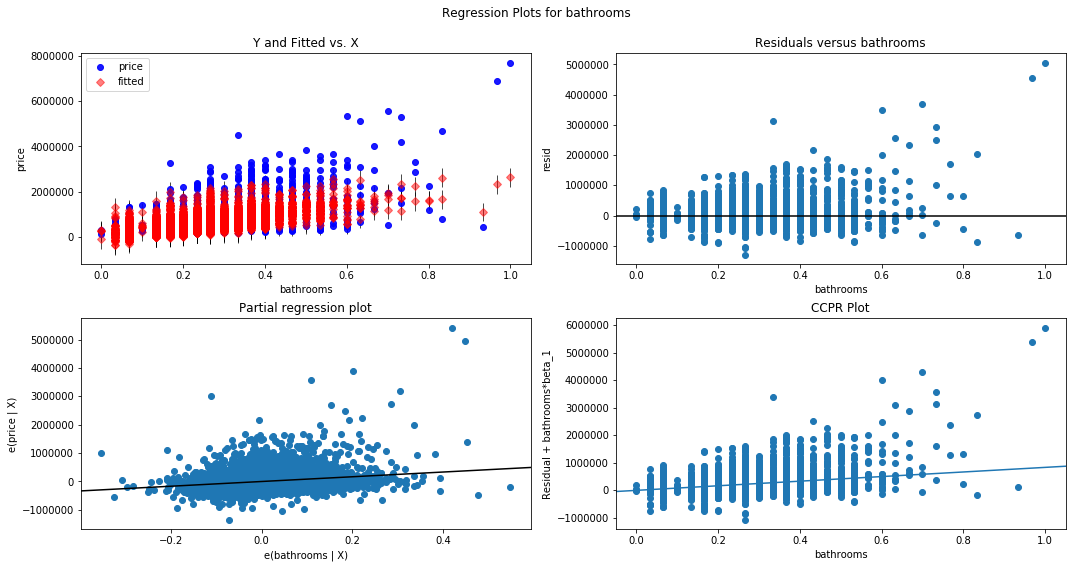

In [115]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bathrooms", fig=fig)
plt.show()

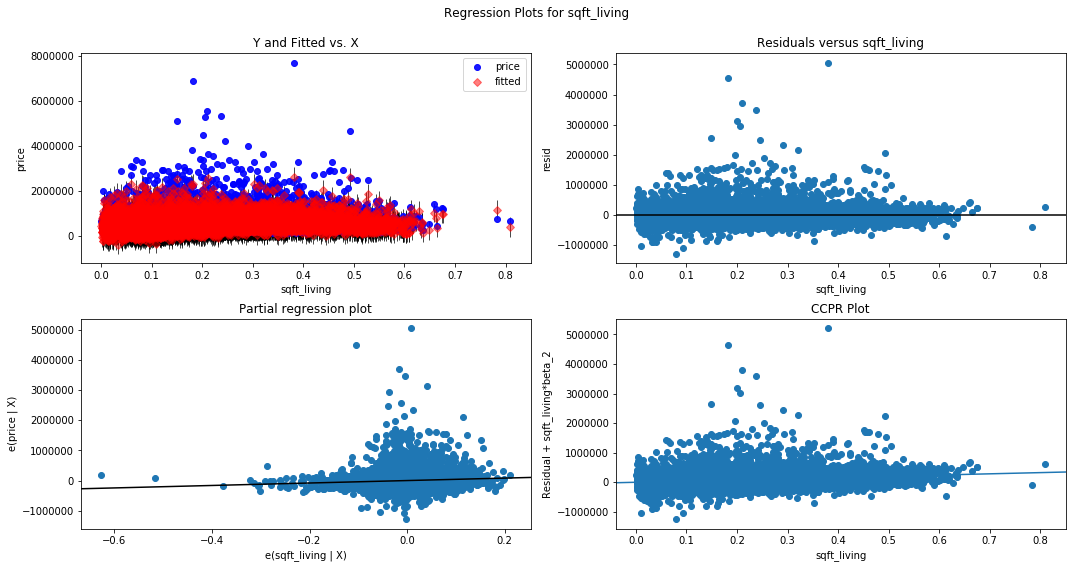

In [116]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [117]:
data.sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [118]:
data.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

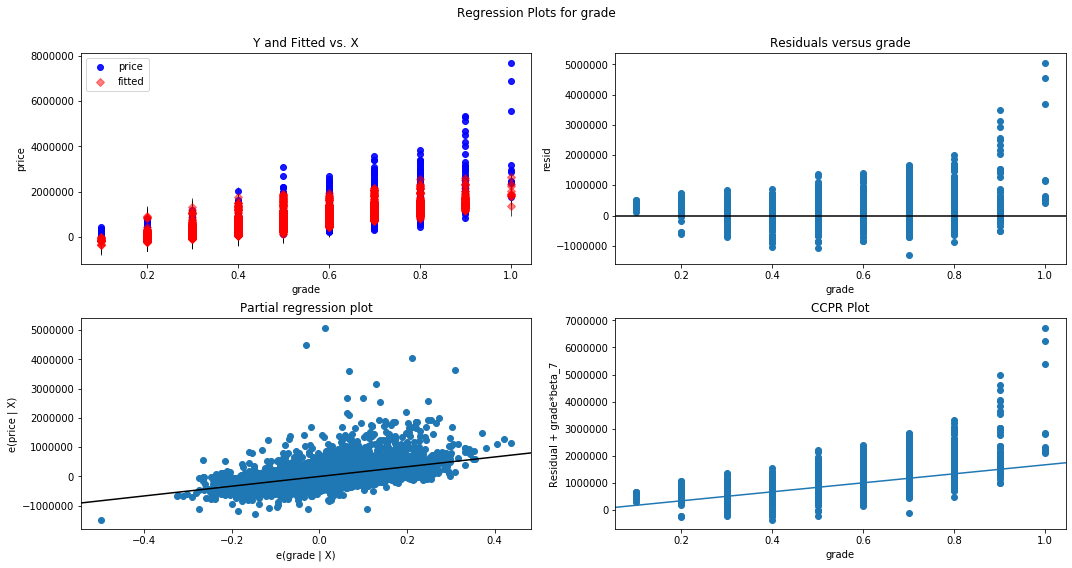

In [119]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)
plt.show()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


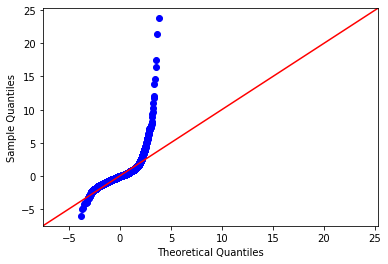

In [120]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

# Q-Q plot Notes:
> The q-q plot is showing potentially why the model is not as accurate as desired.  The residuals are not following a normal distribution

Text(0.5, 1.0, 'Bathrooms effect on Price')

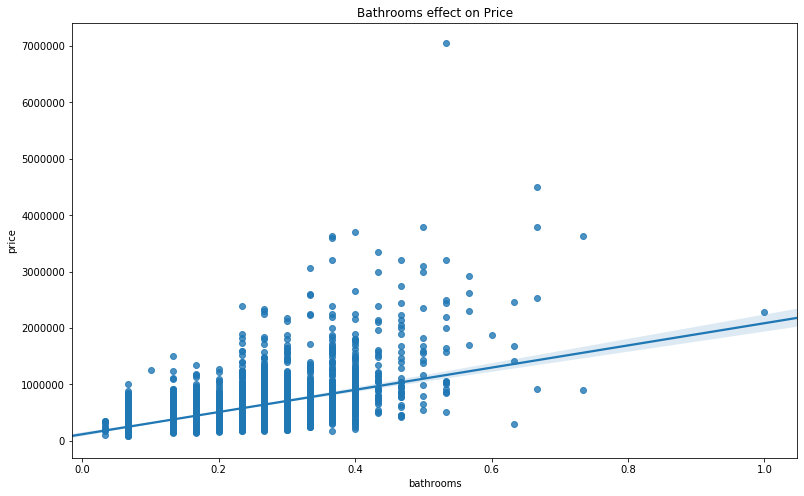

In [125]:
fig = plt.figure(figsize=(13,8))
fig = sns.regplot(x="bathrooms", y="price", data=X_test)
plt.title('Bathrooms effect on Price')

Text(0.5, 1.0, 'Property grade effect on Price')

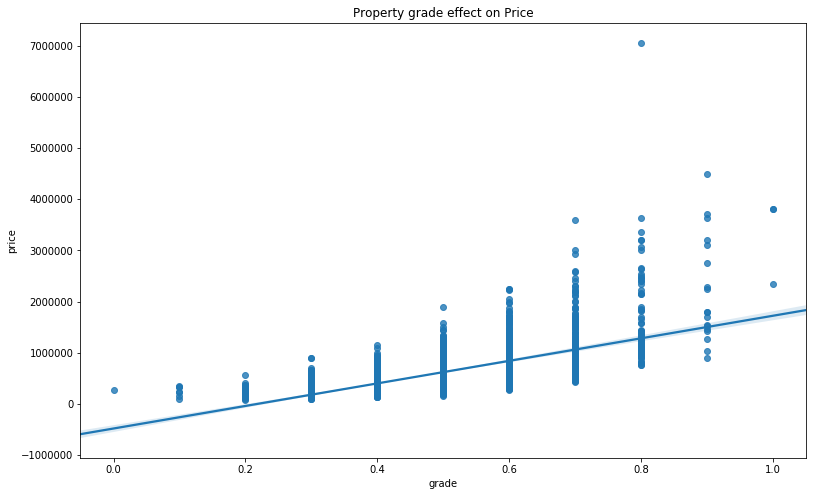

In [128]:
fig = plt.figure(figsize=(13,8))
fig = sns.regplot(x="grade", y="price", data=X_test)
plt.title('Property grade effect on Price')

Text(0.5, 1.0, 'Living Space sqft effect on Price')

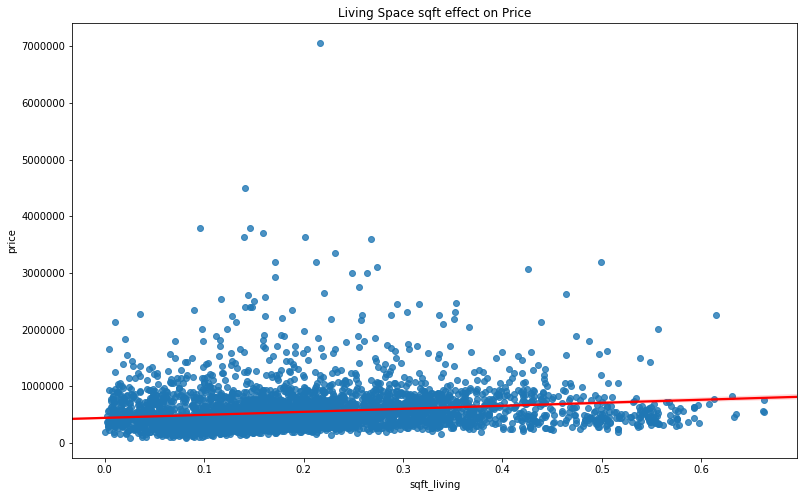

In [138]:
fig = plt.figure(figsize=(13,8))
fig = sns.regplot(x="sqft_living", y="price", data=X_test, line_kws={'color': 'r'})
plt.title('Living Space sqft effect on Price')